## 2차원 데이터 정리

In [1]:
import numpy as np
import pandas as pd

%precision 3

pd.set_option('precision',3)

In [2]:
df = pd.read_csv('./ch2_scores_em.csv')

df의 처음 10명에 해당하는 데이터를 가지고와,
각각에 A,B,C... 라는 Index를 부여

In [4]:
en_scores = np.array(df['english'])[:10]
ma_scores = np.array(df['mathematics'])[:10]

scores_df = pd.DataFrame({'english':en_scores,
                          'mathematics':ma_scores},
                         index = pd.Index(['A','B','C','D','E',
                                           'F','G','H','I','J'],
                                          name = 'student'))
scores_df

,english,mathematics
student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76
F,48,60
G,65,81
H,49,66
I,65,78


### 두 데이터 사이의 관계를 나타내는 지표

#### 공분산

양의 상관관계에 있다고 생각되는 데이터의 관계성을 수치화 할 때  
`공분산` 이라는 지표를 사용한다

공분산이 양의 값 = 양의 상관관계  
공분산이 음의 값 = 음의 상관관계  
공분산이 0에 가까움 = 무상관

In [5]:
summary_df = scores_df.copy()
summary_df['english_deviation'] =\
    summary_df['english'] - summary_df['english'].mean()
summary_df['mathematics_deviation'] =\
    summary_df['mathematics'] - summary_df['mathematics'].mean()
summary_df['product of deviations'] =\
    summary_df['english_deviation'] * summary_df['mathematics_deviation']
summary_df

,english,mathematics,english_deviation,mathematics_deviation,product of deviations
student,,,,,
A,42,65,-13.0,-6.4,83.2
B,69,80,14.0,8.6,120.4
C,56,63,1.0,-8.4,-8.4
D,41,63,-14.0,-8.4,117.6
E,57,76,2.0,4.6,9.2
F,48,60,-7.0,-11.4,79.8
G,65,81,10.0,9.6,96.0
H,49,66,-6.0,-5.4,32.4
I,65,78,10.0,6.6,66.0


In [6]:
summary_df['product of deviations'].mean()

62.800

영어 점수와 수학 점수는 양의 상관관계에 있다

Numpy의 경우,  공분산은 cov 함수로 구할 수 있다  
다만 반환값은 공분산값이 아닌 `공분산 행렬` 또는 `분산공분산 행렬` 이라 부르는 행렬이다 

In [7]:
cov_mat = np.cov(en_scores, ma_scores, ddof=0)
cov_mat

array([[86.  , 62.8 ],
       [62.8 , 68.44]])

행렬의 첫번째 행과 첫번째 열이 첫번째 인수인 영어,
두번째 행과 두번째 열이 두번째 인수인 수학에 대응하고,  
둘을 교차하여 1행 2열의 성분과 2행 1열의 성분이 영어와 수학의 공분산에 해당된다

In [8]:
cov_mat[0, 1], cov_mat[1, 0]

(62.800, 62.800)

cov_mat의 `[0, 1]` 성분과 `[1,0]` 성분이 공분산이 된다

#### 상관계수

상관계수는 반드시 -1과 1 사이의 값   
데이터가 양의 상관관계일수록 1에 가깝고,  
음의 상관관계일수록 -1에 가깝다  
무상관이면 0이 된다  

상관계수가 -1 일때와 1일때  
데이터가 완전히 직선상에 놓인다  

In [9]:
np.cov(en_scores, ma_scores, ddof=0)[0,1] /\
    (np.std(en_scores) * np.std(ma_scores))

0.819

영어점수와 수학점수의 상관계수는 0.819로 1에 가깝다 = `양의 상관계수`

Numpy의 경우,  상관계수는 `corrcoef` 함수로 계산이 가능하다  

반환값은 공분산과 마찬가지로 상관행렬이라 부르는 행렬이다

In [10]:
np.corrcoef(en_scores, ma_scores)

array([[1.   , 0.819],
       [0.819, 1.   ]])

행렬의 성분은 공분산의 행렬 성분과 동일하다 

DataFrame의 경우, corr 메소드와 동일한 결과를 얻을 수 있다

In [11]:
scores_df.corr()

,english,mathematics
english,1.000,0.819
mathematics,0.819,1.000


### 2차원 데이터의 시각화

In [12]:
import matplotlib.pyplot as plt

%matplotlib inline

####  산점도

scatter 메소드를 사용해 산점도를 그릴 수 있다  
첫번째 인수가 x축, 두번째 인수가 y축 이다

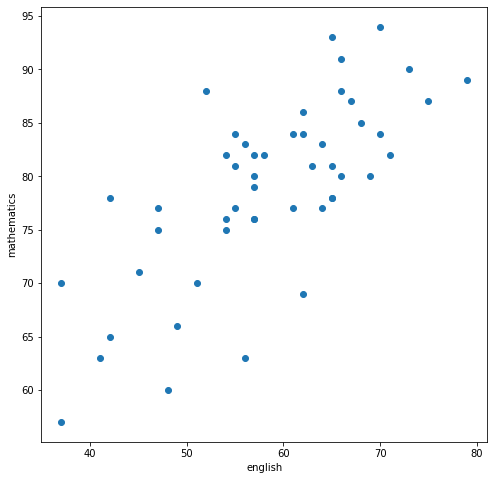

In [13]:
english_scores = np.array(df['english'])
math_scores = np.array(df['mathematics'])

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

# 산점도

ax.scatter(english_scores, math_scores)
ax.set_xlabel('english')
ax.set_ylabel('mathematics')

plt.show()

이 산점도로 알 수 있는것은 수학점수가 높은사람이 영어점수도 높은 경향이 있다는 것이다

#### 회귀직선

두 데이터 사이의 관계를 더욱 잘 나타내는 직선

matplotlib에는 회귀 직선을 그리는 메소드가 없기 때문에 Numpy로 구한다  

`np.polyfit` 함수와 `np.ploy1d` 함수를 사용한다

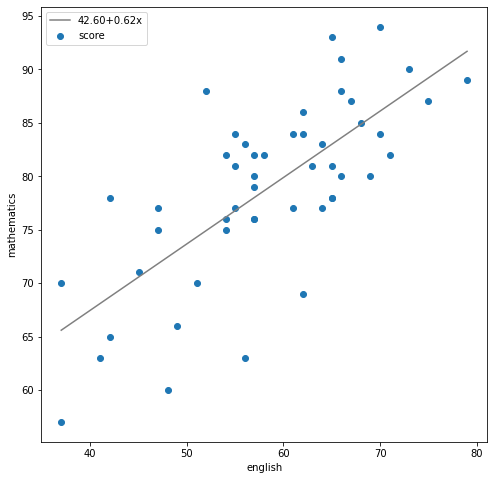

In [16]:
# 계수 B_0 와 B_1을 구한다
poly_fit = np.polyfit(english_scores,math_scores, 1)
# B_0 + B_1 x 를 반환하는 함수를 작성
poly_1d = np.poly1d(ploy_fit)
# 직선을 그리기 위해 x좌표를 생성
xs = np.linspace(english_scores.min(), english_scores.max())
# xs에 대응하는 y좌표를 구한다
ys = poly_1d(xs)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.scatter(english_scores, math_scores, label='score')
ax.plot(xs, ys, color='gray',
        label=f'{ploy_fit[1]:.2f}+{ploy_fit[0]:.2f}x')
ax.set_xlabel('english')
ax.set_ylabel('mathematics')

# 범례표시
ax.legend(loc='upper left')

plt.show()

#### 히트맵

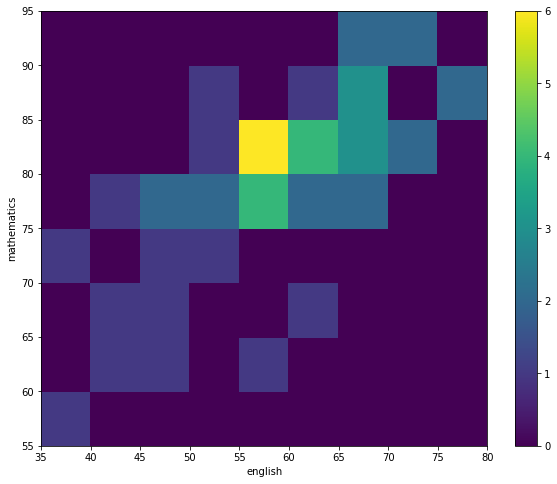

In [17]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

# 영어 점수가 35점부터 80점까지 5점 간격, 수학점수가 55점에서 95점까지 5점 간격으로
c = ax.hist2d(english_scores, math_scores,
              bins=[9,8], range=[(35,80),(55, 95)])
ax.set_xlabel('english')
ax.set_ylabel('mathematics')
ax.set_xticks(c[1])
ax.set_yticks(c[2])
# 컬러 바 표시
fig.colorbar(c[3], ax=ax)
plt.show()

### 앤스컴의 예

동일한 지표를 가지고 있지만 전혀 다른 데이터가 되는 예 


In [19]:
anscombe_data = np.load('./ch3_anscombe.npy')
print(anscombe_data.shape)
anscombe_data[0]

(4, 11, 2)


array([[10.  ,  8.04],
       [ 8.  ,  6.95],
       [13.  ,  7.58],
       [ 9.  ,  8.81],
       [11.  ,  8.33],
       [14.  ,  9.96],
       [ 6.  ,  7.24],
       [ 4.  ,  4.26],
       [12.  , 10.84],
       [ 7.  ,  4.82],
       [ 5.  ,  5.68]])

각 데이터의 평균, 분산, 상관계수, 회귀직선을 계산해 DataFrame으로 정리

In [20]:
stats_df = pd.DataFrame(index=['X_mean','X_variance','Y_mean',
                               'Y_variance','X&Y_correlation',
                               'X&Y_regression line'])
for i, data in enumerate(anscombe_data):
  dataX = data[:,0]
  dataY = data[:,1]
  ploy_fit = np.polyfit(dataX, dataY, 1)
  stats_df[f'data{i+1}'] =\
      [f'{np.mean(dataX):.2f}',
       f'{np.var(dataX):.2f}',
       f'{np.mean(dataY):.2f}',
       f'{np.var(dataY):.2f}',
       f'{np.corrcoef(dataX, dataY)[0,1]:.2f}',
       f'{ploy_fit[1]:.2f}+{ploy_fit[0]:.2f}x']
stats_df

,data1,data2,data3,data4
X_mean,9.00,9.00,9.00,9.00
X_variance,10.00,10.00,10.00,10.00
Y_mean,7.50,7.50,7.50,7.50
Y_variance,3.75,3.75,3.75,3.75
X&Y_correlation,0.82,0.82,0.82,0.82
X&Y_regression line,3.00+0.50x,3.00+0.50x,3.00+0.50x,3.00+0.50x


모든 데이터가 평균부터 회귀직선까지 동일하다  
지표상으로는 네가지 데이터가 모두 동일하다는 것이다  

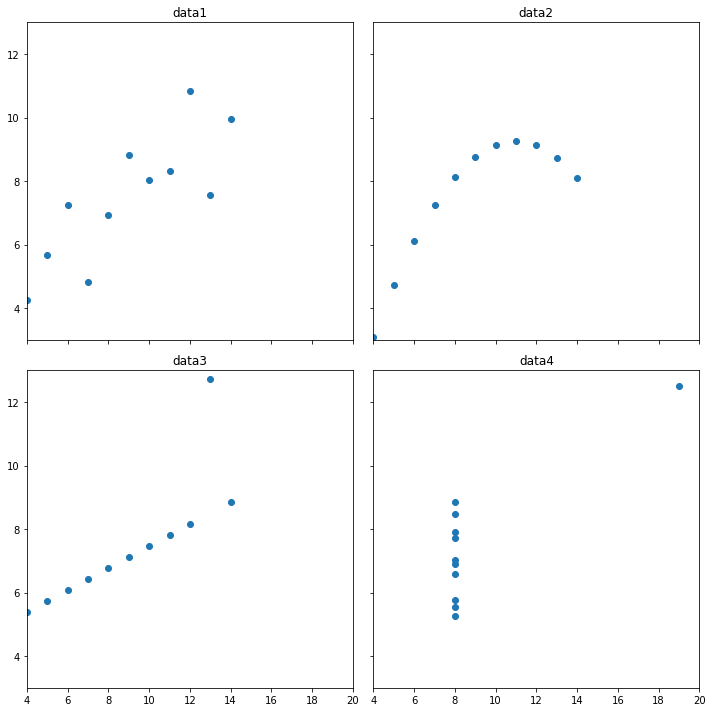

In [22]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10),
                         sharex=True, sharey=True)

xs = np.linspace(0,30,100)
for i, data in enumerate(anscombe_data):
  ploy_fit = np.polyfit(data[:,0], data[:,1], 1)
  ploy_1d = np.poly1d(ploy_fit)
  ys = poly_1d(xs)
  # 그리는 영역 선택
  ax = axes[i//2, i%2]
  ax.set_xlim([4,20])
  ax.set_ylim([3,13])
  # 타이틀 부여
  ax.set_title(f'data{i+1}')
  ax.scatter(data[:,0], data[:,1])
  ax.plot(xs, ys, color='gray')

# 그래프 사이 간격 좁히기
plt.tight_layout()
plt.show()


보다시피 지표는 완전히 동일하지만 그래프로 나타낼 경우 전혀 다른 분포를 띄고 있다  

지표를 과신하지 말고 데이터 분석 시에는 가능하면 그림을 그려야 한다는 것을 나타낸다